## Packages

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

## Some Tests

In [2]:
t_signal = np.arange(0, 1.5, 0.0001)
t_signal.shape

(15000,)

In [4]:
s = 2 * np.sin(2 * np.pi * 330 * t_signal) + 1 * np.sin(2 * np.pi * 440 * t_signal)
s.shape

(15000,)

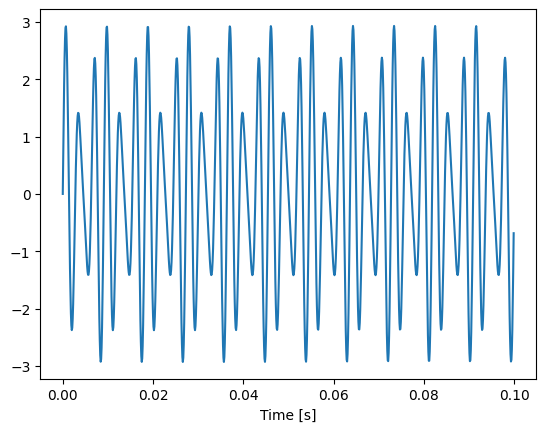

In [10]:
plt.plot(t_signal[t_signal < .1], s[t_signal < .1])
plt.xlabel("Time [s]") 
plt.show()

In [8]:
s_hat = np.fft.fft(s)
freq_s = np.fft.fftfreq(len(t_signal), d=t_signal[1] - t_signal[0])
s_hat_abs = 2 * np.abs(s_hat) / len(t_signal)

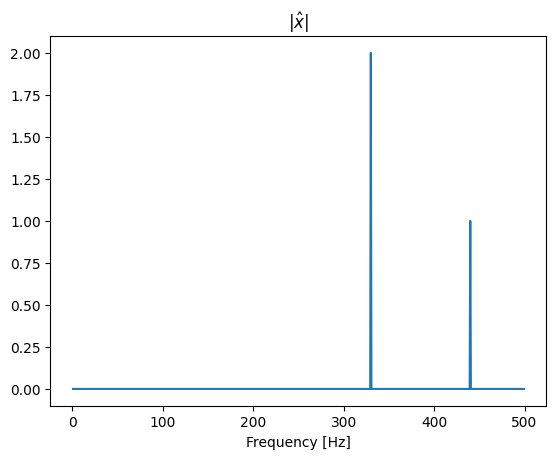

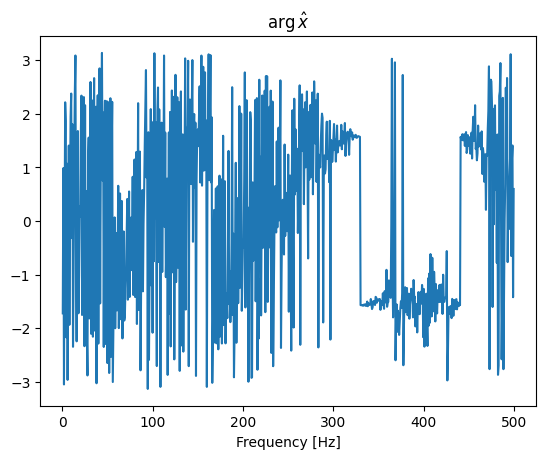

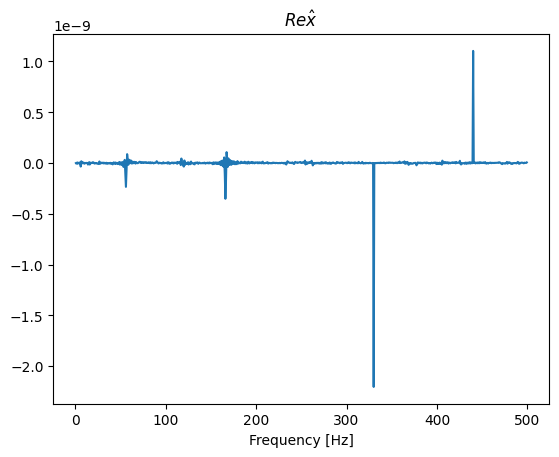

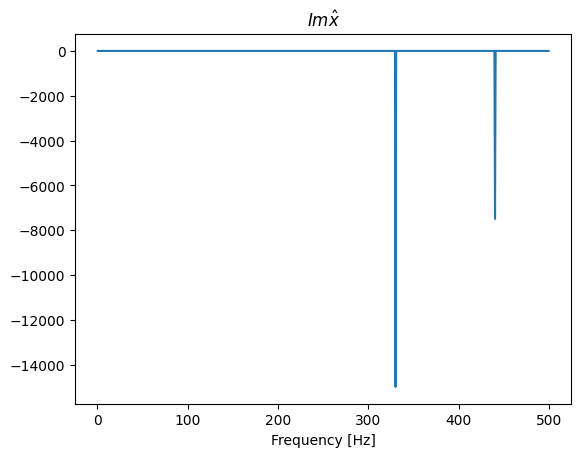

In [9]:
L = np.logical_and(freq_s > 0, freq_s < 500)

plt.plot(freq_s[L], s_hat_abs[L])
plt.xlabel("Frequency [Hz]")
plt.title(r"$\left|\hat{x}\right|$")
plt.show()

plt.plot(freq_s[L], np.angle(s_hat)[L])
plt.xlabel("Frequency [Hz]")
plt.title(r"$\arg\hat{x}$")
plt.show()

plt.plot(freq_s[L], s_hat.real[L])
plt.xlabel("Frequency [Hz]")
plt.title(r"$Re \hat{x}$")
plt.show()

plt.plot(freq_s[L], s_hat.imag[L])
plt.xlabel("Frequency [Hz]")
plt.title(r"$Im \hat{x}$")
plt.show()

## Read wav file

In [13]:
wav_file = 'data/test.wav'
samplerate, data = wavfile.read(wav_file)
samplerate

48000

In [12]:
try:
    x = data[:, 0]
except IndexError as e:
    x = data

x.shape

(55716,)

### Wav file as np.ndarray

In [16]:
n = x.shape[0]
duration = n / samplerate
t = np.linspace(0.0, duration, n)
dt = t[1] - t[0]
duration

1.16075

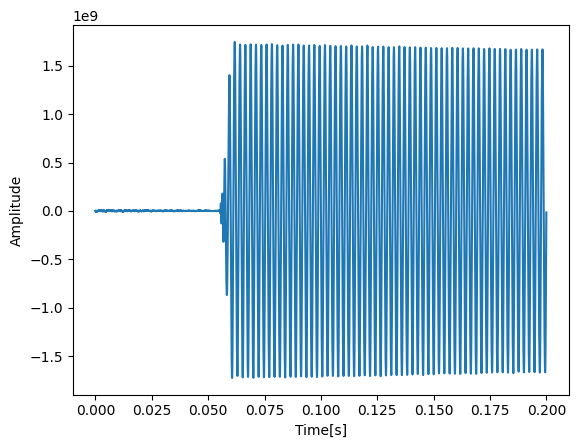

In [17]:
plt.plot(t[t < .2 ], x[ t < .2], label='sound')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.show()

### Fourier Transform of wav file

In [18]:
x_hat = np.fft.fft(x)
freq_x = np.fft.fftfreq(n, d=dt)
x_hat_abs = 2 * np.abs(x_hat) / n

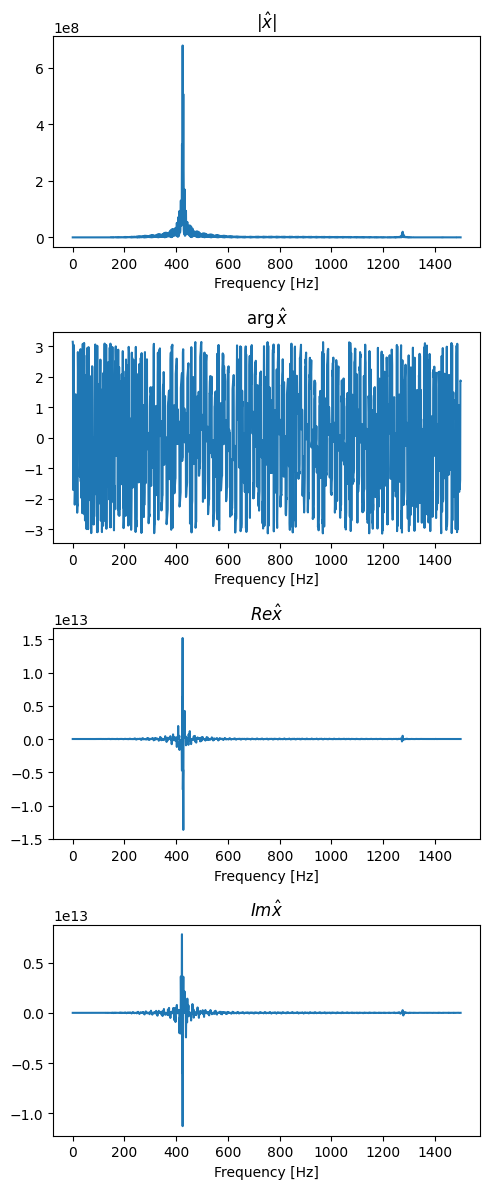

In [19]:
k = 1 << 5

fig, ax = plt.subplots(4, 1, figsize=(5, 12))

ax[0].plot(freq_x[:n // k], x_hat_abs[:n // k])
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_title(r"$\left|\hat{x}\right|$")

ax[1].plot(freq_x[:n // k], np.angle(x_hat)[:n // k])
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_title(r"$\arg\hat{x}$")

ax[2].plot(freq_x[:n // k], x_hat.real[:n // k])
ax[2].set_xlabel("Frequency [Hz]")
ax[2].set_title(r"$Re \hat{x}$")

ax[3].plot(freq_x[:n // k], x_hat.imag[:n // k])
ax[3].set_xlabel("Frequency [Hz]")
ax[3].set_title(r"$Im \hat{x}$")

fig.tight_layout()
plt.show()

## Create a new wav file

In [28]:
tt = np.arange(start=0.0, stop=2.0, step=1 / samplerate)

In [29]:
w = 2 * np.pi * 330
y = np.sin(w * tt**2)

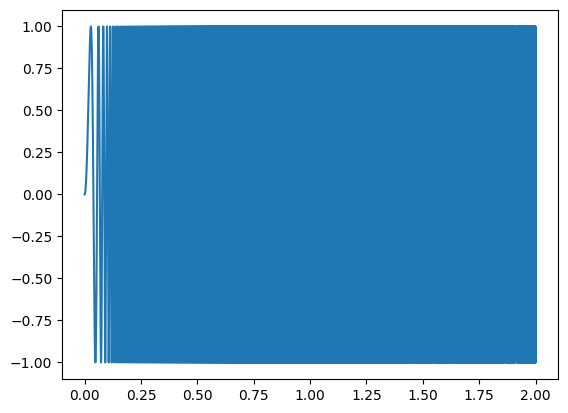

In [30]:
l = 20000
plt.plot(tt[:], y[:])
plt.show()

In [31]:
wavfile.write(filename='sound.wav', rate=samplerate, data=y)

In [32]:
y_hat = np.fft.fft(y)
freq_y = np.fft.fftfreq(len(tt), d=tt[1] - tt[0])

y_hat_abs = 2 * np.abs(y_hat) / len(tt)

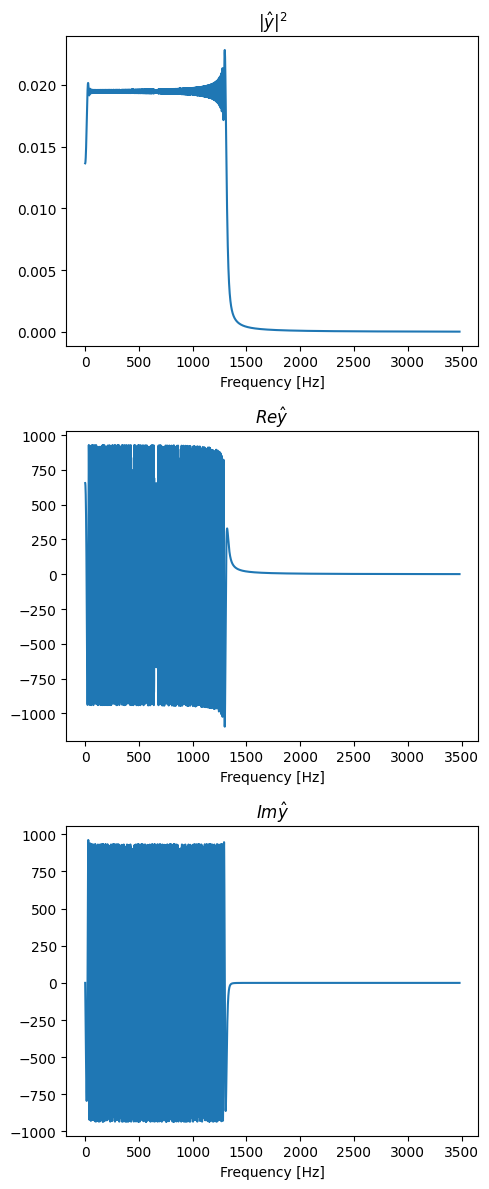

In [34]:
k = 1 << 3

fig, ax = plt.subplots(3, 1, figsize=(5, 12))

ax[0].plot(freq_y[:n // k], y_hat_abs[:n // k])
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_title(r"$\left|\hat{y}\right|^2$")

ax[1].plot(freq_y[:n // k], y_hat.real[:n // k])
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_title(r"$Re \hat{y}$")

ax[2].plot(freq_y[:n // k], y_hat.imag[:n // k])
ax[2].set_xlabel("Frequency [Hz]")
ax[2].set_title(r"$Im \hat{y}$")

fig.tight_layout()
plt.show()

## Spectogram

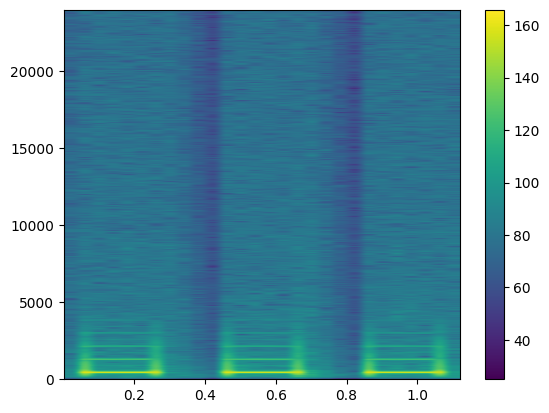

In [35]:
plt.specgram(x, Fs=samplerate, NFFT=2048)
plt.colorbar()
plt.show()

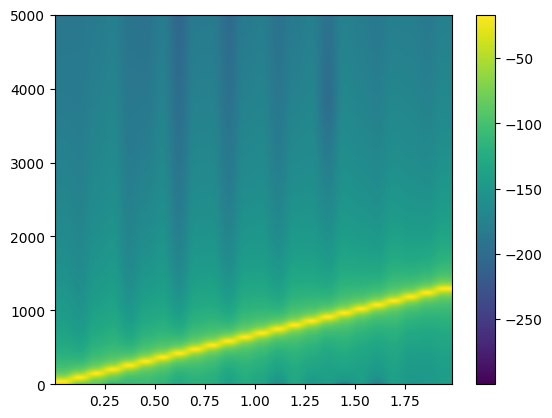

In [38]:
plt.specgram(y, Fs=samplerate, NFFT=4096)
plt.ylim(0, 5000)
plt.colorbar()
plt.show()

## Satie

In [39]:
sr_satie, music_satie = wavfile.read('data/satie.wav')
sr_satie, music_satie.shape

(44100, (8097088, 2))

In [40]:
duration_satie = music_satie.shape[0] / sr_satie
duration_satie

183.60743764172335

In [41]:
time_satie = np.arange(start=0, stop=duration_satie, step=1 / sr_satie)
time_satie.shape

(8097088,)

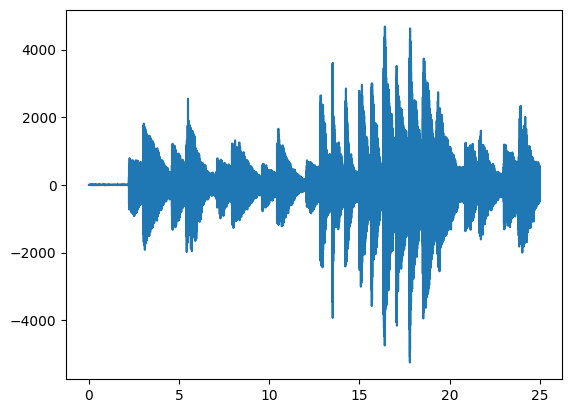

In [42]:
sec = 25
satie = music_satie[:sec * sr_satie, 0]
plt.plot(time_satie[:sec * sr_satie], satie)
plt.show()

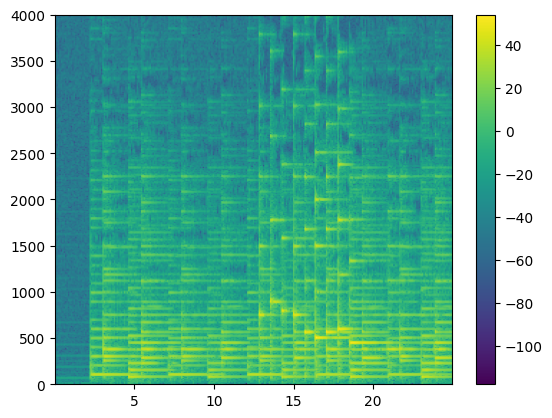

In [44]:
plt.specgram(satie, NFFT=4096, Fs=sr_satie)
plt.colorbar()
plt.ylim(0, 4000)
plt.show()

## Debussy

In [45]:
sr_debussy, music_debussy = wavfile.read('data/debussy.wav')
sr_debussy, music_debussy.shape

(44100, (13410368, 2))

In [46]:
duration_debussy = music_debussy.shape[0] / sr_debussy
duration_debussy

304.08997732426303

In [47]:
time_debussy = np.arange(start=0, stop=duration_debussy, step=1 / sr_debussy)
time_debussy.shape

(13410368,)

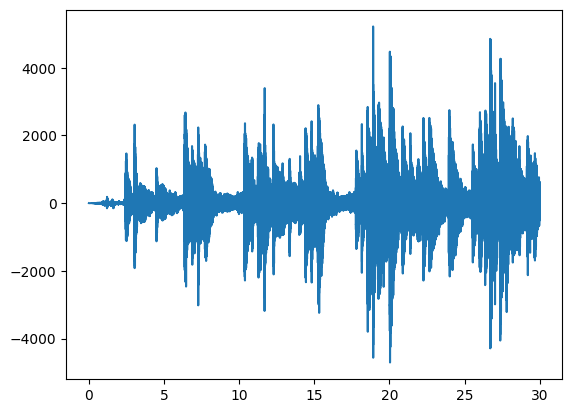

In [48]:
sec = 30
debussy = music_debussy[:sec * sr_debussy, 0]
plt.plot(time_debussy[:sec * sr_debussy], debussy)
plt.show()

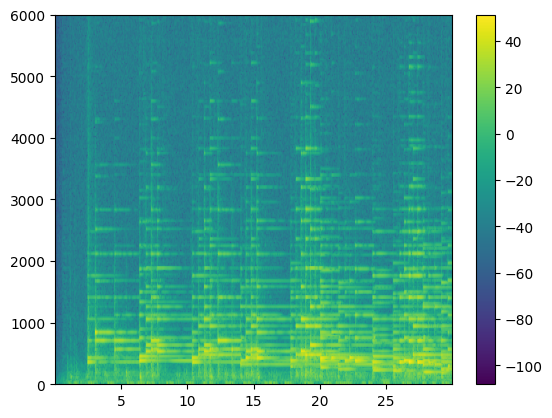

In [49]:
plt.specgram(debussy, NFFT=2048, Fs=sr_debussy)
plt.colorbar()
plt.ylim(0, 6000)
plt.show()